# IBM Assignment 4

## Clustering & Classification

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

## 1. Download the dataset
## 2. Load the dataset

In [4]:
df = pd.read_csv("/content/Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## 3. Perform the visualizations

### Univariate Analysis

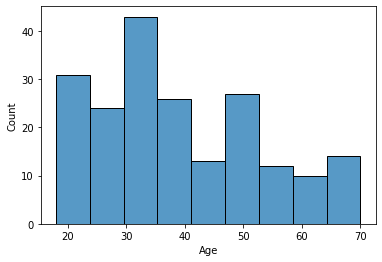

In [5]:
sns.histplot(df['Age'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


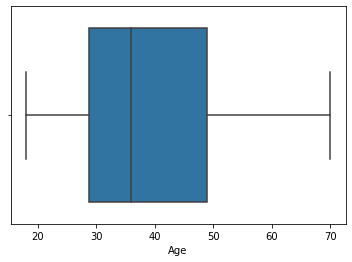

In [6]:
sns.boxplot(df['Age'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


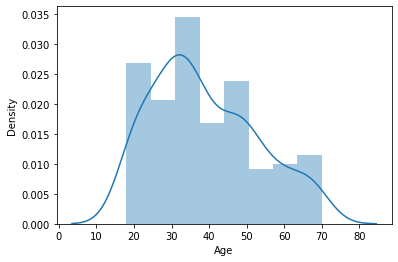

In [7]:
sns.distplot(df['Age'])

### Bi-Variate Analysis

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


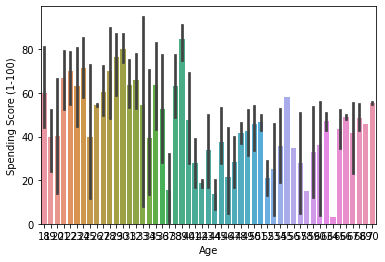

In [8]:
sns.barplot(df['Age'],df['Spending Score (1-100)'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


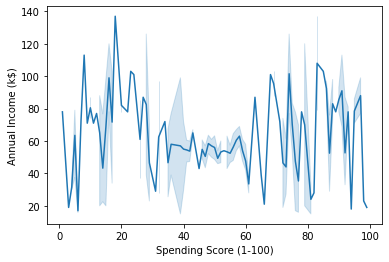

In [9]:
sns.lineplot(df['Spending Score (1-100)'], df['Annual Income (k$)'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


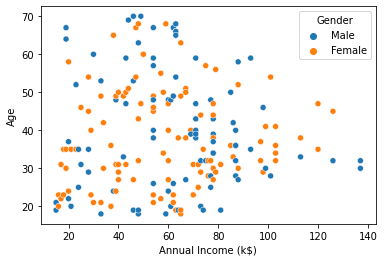

In [10]:
sns.scatterplot(df['Annual Income (k$)'],df['Age'],hue =df['Gender'])

### Multi-variate Analysis

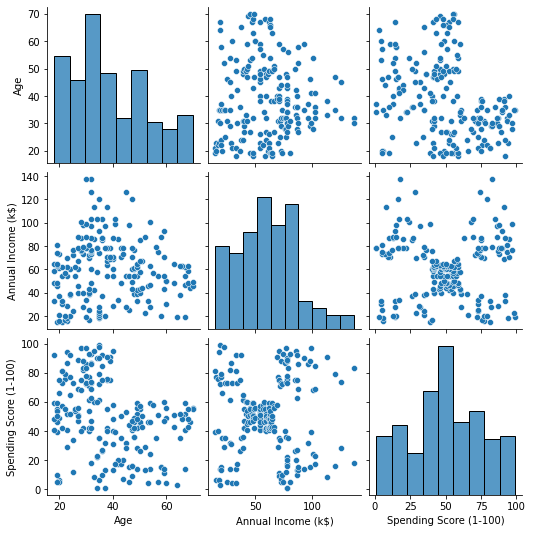

In [11]:
sns.pairplot(data=df[["Gender", "Age","Annual Income (k$)","Spending Score (1-100)"]])

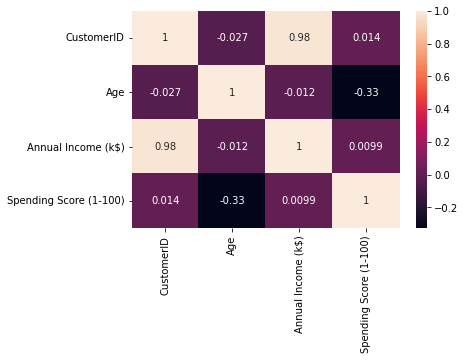

In [12]:
sns.heatmap(df.corr(),annot=True)

## 4. Perform descriptive statistics on the dataset

In [13]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [14]:
df.drop('CustomerID',axis=1,inplace=True)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


## 5. Check for the missing values and deal with them

In [15]:
df.isnull().any()

Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

## 6. Find the outliers and replace the outliers

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


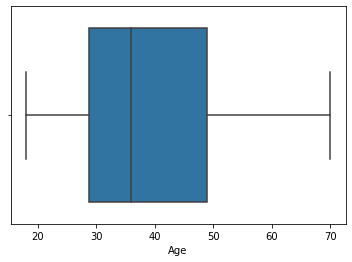

In [16]:
sns.boxplot(df['Age'])

## 7. Check for categorical columns and perform encoding

In [17]:
from sklearn.preprocessing import LabelEncoder
l_en = LabelEncoder()

In [18]:
df['Gender'] = l_en.fit_transform(df['Gender'])
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


## 8. Scaling the data

In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(df)
data_scaled[0:5]

array([[1.        , 0.01923077, 0.        , 0.3877551 ],
       [1.        , 0.05769231, 0.        , 0.81632653],
       [0.        , 0.03846154, 0.00819672, 0.05102041],
       [0.        , 0.09615385, 0.00819672, 0.7755102 ],
       [0.        , 0.25      , 0.01639344, 0.39795918]])

## 9. Perform any of the clustering algorithms

In [20]:
from sklearn.cluster import KMeans
km = KMeans()
res = km.fit_predict(data_scaled)
res

array([3, 3, 2, 2, 2, 2, 2, 2, 6, 2, 6, 7, 0, 2, 4, 3, 2, 3, 6, 7, 3, 3,
       0, 3, 0, 3, 0, 3, 0, 2, 6, 2, 6, 3, 0, 2, 0, 2, 2, 2, 0, 3, 6, 2,
       0, 2, 0, 2, 2, 2, 0, 3, 2, 6, 0, 6, 0, 6, 2, 6, 6, 3, 0, 0, 6, 3,
       0, 0, 3, 2, 6, 0, 0, 0, 6, 3, 0, 3, 2, 0, 6, 3, 6, 0, 2, 6, 0, 2,
       2, 0, 0, 3, 6, 0, 2, 3, 0, 2, 6, 3, 2, 0, 6, 3, 6, 2, 0, 6, 6, 6,
       6, 2, 0, 3, 2, 2, 0, 0, 0, 0, 3, 5, 7, 1, 2, 7, 4, 1, 6, 1, 4, 1,
       2, 7, 4, 7, 5, 1, 4, 7, 5, 1, 2, 7, 4, 1, 4, 7, 5, 1, 4, 1, 5, 7,
       5, 7, 4, 7, 4, 7, 0, 7, 4, 7, 4, 7, 4, 7, 5, 1, 4, 1, 4, 1, 5, 7,
       4, 1, 4, 1, 5, 7, 4, 7, 5, 1, 5, 1, 5, 7, 5, 7, 4, 7, 5, 7, 5, 1,
       4, 1], dtype=int32)

In [21]:
data1 = pd.DataFrame(data_scaled, columns = df.columns)
data1.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.0,0.019231,0.000000,0.387755
1,1.0,0.057692,0.000000,0.816327
2,0.0,0.038462,0.008197,0.051020
3,0.0,0.096154,0.008197,0.775510
4,0.0,0.250000,0.016393,0.397959


## 10. Add the cluster data with the primary dataset

In [22]:
data1['kclus']  = pd.Series(res)
data1.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),kclus
0,1.0,0.019231,0.000000,0.387755,3
1,1.0,0.057692,0.000000,0.816327,3
2,0.0,0.038462,0.008197,0.051020,2
3,0.0,0.096154,0.008197,0.775510,2
4,0.0,0.250000,0.016393,0.397959,2


In [23]:
data1['kclus'].unique()

array([3, 2, 6, 7, 0, 4, 5, 1], dtype=int32)

In [24]:
data1['kclus'].value_counts()

2    37
0    36
6    26
3    24
7    24
4    20
1    18
5    15
Name: kclus, dtype: int64

## 11. Split the data into dependent and independent variables

In [25]:
ind = data1.iloc[:,0:4]
ind.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.0,0.019231,0.000000,0.387755
1,1.0,0.057692,0.000000,0.816327
2,0.0,0.038462,0.008197,0.051020
3,0.0,0.096154,0.008197,0.775510
4,0.0,0.250000,0.016393,0.397959


In [26]:
dep = data1.iloc[:,4:]
dep.head()

,kclus
0,3
1,3
2,2
3,2
4,2


## 12. Split the data into training and testing

In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(ind,dep,test_size=0.3,random_state=1)
x_train.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
116,0.0,0.865385,0.409836,0.428571
67,0.0,0.961538,0.270492,0.479592
78,0.0,0.096154,0.319672,0.520408
42,1.0,0.576923,0.196721,0.357143
17,1.0,0.038462,0.049180,0.663265


In [28]:
x_test.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
58,0.0,0.173077,0.254098,0.510204
40,0.0,0.903846,0.188525,0.346939
34,0.0,0.596154,0.147541,0.132653
102,1.0,0.942308,0.385246,0.591837
184,0.0,0.442308,0.688525,0.387755


In [29]:
y_train.head()

,kclus
116,0
67,0
78,2
42,6
17,3


In [30]:
y_test.head()

,kclus
58,2
40,0
34,0
102,6
184,5


## 12. Build the model
## 14. Train the model
## 15. Test the model


In [31]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [32]:
pred_test = lr.predict(x_test)
pred_test[0:5]

array([[2.34883728],
       [2.34154613],
       [2.03070756],
       [3.97028801],
       [3.9165975 ]])

## 16. Measure the performance using metrics

In [33]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
mse = mean_squared_error(pred_test,y_test)
print("The Mean squared error is: ", mse)

The Mean squared error is:  5.384777216831924


In [34]:
rmse = np.sqrt(mse)
print("The Root mean squared error is: ", rmse)

The Root mean squared error is:  2.3205122746565947


In [35]:
mae = mean_absolute_error(pred_test,y_test)
print("The Mean absolute error is: ", mae)

The Mean absolute error is:  1.840395117784606


In [37]:
from sklearn.metrics import accuracy_score
acc = lr.score(x_test,y_test)
print("The accuracy is: ", acc)

The accuracy is:  0.03728655241383971
